In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [14]:
df_power = pd.read_csv("../data/raw/openpowerlifting-2023-12-16-fb2308df.csv")

C:\Users\enrik\AppData\Local\Temp\ipykernel_17456\499287465.py:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_power = pd.read_csv("../data/raw/openpowerlifting-2023-12-16-fb2308df.csv")


###

In [94]:
df_p= df_power.copy()


In [130]:
df_p.isnull().sum()



Name             0
Sex              0
Event            0
Equipment        0
Age              0
AgeClass         0
Division         0
BodyweightKg     0
WeightClassKg    0
Squat1Kg         0
Squat2Kg         0
Squat3Kg         0
Bench1Kg         0
Bench2Kg         0
Bench3Kg         0
Deadlift1Kg      0
Deadlift2Kg      0
Deadlift3Kg      0
TotalKg          0
Place            0
Goodlift         0
Country          0
Federation       0
Date             0
MeetTown         0
MeetName         0
dtype: int64

In [115]:
cols_to_convert = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']

df_p[cols_to_convert] = df_p[cols_to_convert].apply(pd.to_numeric, errors='coerce') # Convertir las columnas seleccionadas a tipo numérico

for col in cols_to_convert:
    df_p[col] = df_p[col].apply(lambda x: max(0, x)) # Reemplazar los valores negativos con cero

In [104]:
age_nan = df_p["Age"].isna() #nos da el nan de las columnas elegidas
ageclass_nan= df_p["AgeClass"].isna()
country_nan = df_p["Country"].isna()
df_p.loc[age_nan & ageclass_nan & country_nan]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
363,Alex Isaias Laguna Mantazole,M,B,Raw,NaN,NaN,NaN,MO,56.0,56,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
365,Jaider Ramos,M,B,Raw,NaN,NaN,NaN,MO,75.0,75,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
367,Diego Luiz de Almeida Bento,M,B,Raw,NaN,NaN,NaN,MO,75.0,75,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
370,Anderson Genuíno dos Reis,M,B,Raw,NaN,NaN,NaN,MO,82.5,82.5,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
371,Hilton M. Otaviano,M,B,Raw,NaN,NaN,NaN,MO,82.5,82.5,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998996,Ray Neeley,M,SBD,Single-ply,NaN,NaN,NaN,Open,75.0,75,...,Yes,NaN,NaN,IPF,IPF,1981-07-25,USA,CA,Santa Clara,World Games
2999001,James Cash,M,SBD,Single-ply,NaN,NaN,NaN,Open,100.0,100,...,Yes,NaN,NaN,IPF,IPF,1981-07-25,USA,CA,Santa Clara,World Games
2999003,Scott Palmer,M,SBD,Single-ply,NaN,NaN,NaN,Open,110.0,110,...,Yes,NaN,NaN,IPF,IPF,1981-07-25,USA,CA,Santa Clara,World Games
2999006,Dave Shaw,M,SBD,Single-ply,NaN,NaN,NaN,Open,NaN,125+,...,Yes,NaN,NaN,IPF,IPF,1981-07-25,USA,CA,Santa Clara,World Games


In [116]:

levantamientos_cols = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Goodlift', 'Wilks']


df_p[levantamientos_cols] = df_p[levantamientos_cols].fillna(0)

In [119]:
modes = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].mode().iloc[0]
df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']] = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].replace(0, np.nan).fillna(modes)


In [129]:
columns_replace_mode = ['Sex','TotalKg', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division', 'BodyweightKg', 'WeightClassKg', 'Place', 'Country', 'Federation', 'Date', 'MeetTown', 'MeetName']

for column in columns_replace_mode:
    df_p[column].fillna(df_p[column].mode()[0], inplace=True)


In [124]:
df_p.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName'],
      dtype='object')

In [125]:
df_p.loc[df_p["Country"].isna(),"Country"] = df_p["Country"].mode().values[0]

In [269]:
age_nan = df_p["Age"].isna() #nos da el nan de las olumnas elegidas
ageclass_nan= df_p["AgeClass"].isna()
country_nan = df_p["Country"].isna()
df_p.loc[age_nan & ageclass_nan & country_nan]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Federation,Date,MeetName,Squat_mean,Bench_mean,Deadlift_mean,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio,Year


In [132]:
df_p.dropna(axis = "index", inplace = True) 
df_p.drop(columns = 'MeetTown', inplace = True)

In [126]:
eliminated_col = ['Bench4Kg','Deadlift4Kg', 'Squat4Kg','MeetState', 'Best3SquatKg','Best3BenchKg','Best3DeadliftKg', 'Glossbrenner', 'Tested', 'MeetCountry', 'Wilks','ParentFederation', 'State','Dots', 'BirthYearClass', ]

df_p.drop(columns = eliminated_col, inplace = True)

In [131]:
null_counts = df_p.isnull().sum()
null_counts


Name             0
Sex              0
Event            0
Equipment        0
Age              0
AgeClass         0
Division         0
BodyweightKg     0
WeightClassKg    0
Squat1Kg         0
Squat2Kg         0
Squat3Kg         0
Bench1Kg         0
Bench2Kg         0
Bench3Kg         0
Deadlift1Kg      0
Deadlift2Kg      0
Deadlift3Kg      0
TotalKg          0
Place            0
Goodlift         0
Country          0
Federation       0
Date             0
MeetTown         0
MeetName         0
dtype: int64

In [134]:
df_p.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'TotalKg', 'Place', 'Goodlift', 'Country', 'Federation',
       'Date', 'MeetName'],
      dtype='object')

In [135]:
modes = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].mode().iloc[0]
df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']] = df_power4[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].replace(0, modes)


In [216]:
df_p['Date'] = pd.to_datetime(df_p['Date'])

In [270]:
df_dl = df_p[['Name', 'Goodlift', 'TotalKg', 'Country','Place',  'AgeClass', 'Division', 'Age', 'Federation',]].head(10)
df_dl

,Name,Goodlift,TotalKg,Country,Place,AgeClass,Division,Age,Federation
0,Alona Vladi,57.10,247.5,Russia,1,24-34,O,33.0,GFP
1,Galina Solovyanova,56.76,282.5,Russia,1,40-44,M1,43.0,GFP
2,Daniil Voronin,41.24,267.5,Russia,1,16-17,T,15.5,GFP
3,Aleksey Krasov,66.68,430.0,Russia,1,35-39,O,35.0,GFP
4,Margarita Pleschenkova,39.34,265.0,Russia,1,24-34,O,26.5,GFP
5,Sergey Timoshenko,39.09,275.0,Russia,1,16-17,T,15.5,GFP
6,Vladimir Karavaev,47.35,335.0,Russia,1,55-59,M2,57.5,GFP
7,Tatyana Altunina,51.79,287.5,Russia,1,24-34,O,26.0,GFP
8,Ruslan Gasanov,81.45,652.5,Russia,1,24-34,O,31.5,GFP
9,Ekaterina Glukhova,51.38,212.5,Russia,1,24-34,O,25.5,GFP


In [138]:
competidores_open = df_p[df_p['Division'] == 'Open']
competidores_open

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,TotalKg,Place,Goodlift,Country,Federation,Date,MeetName
2233,Oliver Apfelthaler,M,SBD,Wraps,25.0,24-34,Open,80.30,82.5,170.0,...,230.0,235.0,-240.0,535.0,1,75.31,Austria,WUAP-AUT,2021-08-28,Österreichische Staatsmeisterschaft & Internat...
2234,Simon Brandstetter,M,SBD,Wraps,31.0,24-34,Open,81.30,82.5,137.0,...,165.0,-185.0,-185.0,390.0,2,54.56,Austria,WUAP-AUT,2021-08-28,Österreichische Staatsmeisterschaft & Internat...
2235,Erik Valent,M,SBD,Multi-ply,37.0,35-39,Open,78.80,82.5,200.0,...,200.0,220.0,245.0,700.0,1,83.38,Slovakia,WUAP-AUT,2021-08-28,Österreichische Staatsmeisterschaft & Internat...
2239,Fabian Senftner,M,SBD,Wraps,22.0,20-23,Open,93.00,100,245.0,...,260.0,280.0,300.0,727.5,1,95.17,Austria,WUAP-AUT,2021-08-28,Österreichische Staatsmeisterschaft & Internat...
2240,Marcus Topf,M,SBD,Wraps,29.0,24-34,Open,98.80,100,220.0,...,270.0,285.0,-307.5,707.5,2,89.89,Austria,WUAP-AUT,2021-08-28,Österreichische Staatsmeisterschaft & Internat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030197,Inna Orobets,F,SBD,Single-ply,45.0,45-49,Open,109.30,84+,235.0,...,200.0,210.0,215.0,645.0,3,93.16,Ukraine,IPF,2016-11-14,World Open Championships
3030198,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,Open,113.22,84+,-237.5,...,185.0,200.0,-210.0,632.5,4,90.57,Hungary,IPF,2016-11-14,World Open Championships
3030199,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,Open,110.79,84+,210.0,...,185.0,190.0,-195.0,617.5,5,88.89,Netherlands,IPF,2016-11-14,World Open Championships
3030200,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,Open,124.53,84+,210.0,...,145.0,-155.0,-155.0,515.0,6,72.24,England,IPF,2016-11-14,World Open Championships


In [274]:
#mirar por nombre
name = 'Rae-Ann Miller'
filtered_rows = df_p[df_p['Name'].str.contains(name, na=True)]

filtered_rows

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Federation,Date,MeetName,Squat_mean,Bench_mean,Deadlift_mean,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio,Year
315869,Rae-Ann Miller,F,SBD,Multi-ply,42.0,40-44,Pro,98.34,90+,200.0,...,XPC,2018-03-02,Finals,200.0,33.333333,200.0,2.033760,0.338960,2.033760,2018
322112,Rae-Ann Miller,F,B,Multi-ply,41.0,40-44,Pro Open,100.61,90+,200.0,...,XPS,2017-02-18,Iron Asylum Full Power Meet,200.0,33.333333,200.0,1.987874,0.331312,1.987874,2017
322180,Rae-Ann Miller,F,SBD,Multi-ply,43.0,40-44,Pro Open,97.70,90+,NaN,...,XPS,2019-11-16,Beasts of NY,NaN,NaN,NaN,0.000000,0.000000,0.000000,2019
322996,Rae-Ann Miller,F,B,Single-ply,41.0,40-44,Open,98.97,90+,200.0,...,XPS,2017-10-21,Iron Maiden Women's Pro/Am,200.0,33.333333,200.0,2.020814,0.336802,2.020814,2017
323041,Rae-Ann Miller,F,B,Unlimited,47.0,45-49,Pro Open,103.87,110,200.0,...,XPS,2023-11-04,War for the Sword,200.0,33.333333,200.0,1.925484,0.320914,1.925484,2023
323422,Rae-Ann Miller,F,B,Unlimited,46.0,45-49,Open,108.41,110,200.0,...,XPS,2022-09-24,F8 NorthEast Bench Invitational,200.0,33.333333,200.0,1.844848,0.307475,1.844848,2022
744694,Rae-Ann Miller,F,B,Unlimited,46.0,45-49,Pro Open,108.41,110,200.0,...,MM,2022-05-21,Nationals,200.0,33.333333,200.0,1.844848,0.307475,1.844848,2022
745194,Rae-Ann Miller,F,B,Unlimited,45.0,45-49,Pro Open,106.59,90+,200.0,...,MM,2021-04-10,Power Wars,200.0,33.333333,200.0,1.876349,0.312725,1.876349,2021
745647,Rae-Ann Miller,F,B,Unlimited,45.0,45-49,Pro Open,102.51,90+,200.0,...,MM,2021-07-17,814 Summer Smackdown Invitational,200.0,86.940000,200.0,1.951029,0.848112,1.951029,2021
746181,Rae-Ann Miller,F,B,Unlimited,47.0,45-49,Pro Open,107.95,110,200.0,...,MM,2023-02-04,Bench for Wolfe II,200.0,33.333333,200.0,1.852710,0.308785,1.852710,2023


In [275]:
top_men = df_p[df_p['Sex'] == 'M'].nlargest(28, 'Goodlift')
top_men['Event'] = 'SBD'

top_men = top_men.drop_duplicates(subset='Name', keep='first') # Eliminar duplicados 

print("Top 10 Hombres con Goodlift más alto:")
top_men[['Name', 'Goodlift', 'Event']]

Top 10 Hombres con Goodlift más alto:


,Name,Goodlift,Event
1003446,Jimmy Kolb,176.13,SBD
1002288,Greg Powell,157.18,SBD
745392,Rob Forell,153.16,SBD
94691,Doug Smithey,145.57,SBD
1001554,Rich Putnam,145.30,SBD
322055,Bob Merkh,145.20,SBD
549426,Tony Carlino,143.51,SBD
92678,Bill Gillespie,142.64,SBD
1002063,Tiny Meeker,142.27,SBD
310352,Kalle Ylitalo-James,142.12,SBD


In [200]:
top_women = df_p[df_p['Sex'] == 'F'].nlargest(10, 'Goodlift')

top_women['Event'] = 'SBD'


print("Top 10 Mujeres con Goodlift más alto:")
top_women[['Name', 'Goodlift', 'Event']]

Top 10 Mujeres con Goodlift más alto:


,Name,Goodlift,Event
2974773,Ekaterina Zaytseva,155.12,SBD
2509883,Ashleigh Hoeta,153.01,SBD
1010363,Katrina Bielomyza,146.59,SBD
984056,Lucy Ogechukwu Ejike,146.49,SBD
323041,Rae-Ann Miller,146.09,SBD
1755602,Marianna Gasparyan,145.62,SBD
2303600,April Mathis,145.50,SBD
1756719,Kristy Hawkins,144.79,SBD
985670,Lucy Ihuoma,144.42,SBD
986193,Esther Osa Oyema,144.30,SBD


In [142]:
index_of_natalie_do = df_power[df_p['Name'] == 'Natalie Do'].index[0]

df_p.loc[index_of_natalie_do, 'Squat1Kg'] = 115.0
df_p.loc[index_of_natalie_do, 'Squat2Kg'] = 122.5
df_p.loc[index_of_natalie_do, 'Squat3Kg'] = 127.5
df_p.loc[index_of_natalie_do, 'Bench1Kg'] = 60.0
df_p.loc[index_of_natalie_do, 'Bench2Kg'] = 62.5
df_p.loc[index_of_natalie_do, 'Bench3Kg'] = 67.5
df_p.loc[index_of_natalie_do, 'Deadlift1Kg'] = 160.0
df_p.loc[index_of_natalie_do, 'Deadlift2Kg'] = 168.0
df_p.loc[index_of_natalie_do, 'Deadlift3Kg'] = -172.5



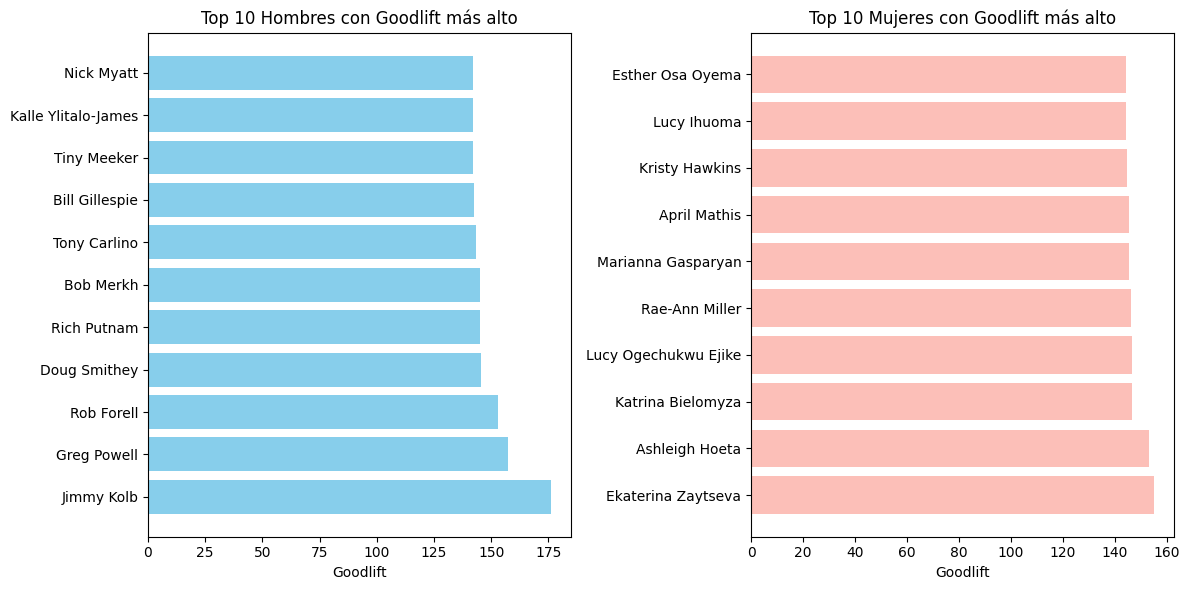

In [198]:
plt.figure(figsize=(12, 6)) #utilizo el top men y women anterior

plt.subplot(1, 2, 1)
plt.barh(top_men['Name'], top_men['Goodlift'], color='skyblue')
plt.xlabel('Goodlift')
plt.title('Top 10 Hombres con Goodlift más alto')

plt.subplot(1, 2, 2)
plt.barh(top_women['Name'], top_women['Goodlift'], color='salmon', alpha = 0.5)
plt.xlabel('Goodlift')
plt.title('Top 10 Mujeres con Goodlift más alto')

plt.tight_layout()
plt.show()

In [181]:
top_women = df_p[(df_p['Sex'] == 'F')].nlargest(10, 'Goodlift')
top_women

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Federation,Date,MeetName,Squat_mean,Bench_mean,Deadlift_mean,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio,Year
2974773,Ekaterina Zaytseva,F,B,Multi-ply,36.0,35-39,Pro Submasters 33-39,82.50,82.5,200.0,...,NAP,2023-09-23,Golden Tiger XVII',200.000000,275.000000,200.000000,2.424242,3.333333,2.424242,2023
2509883,Ashleigh Hoeta,F,B,Unlimited,27.0,24-34,Open,109.50,110,200.0,...,IPL-NZ,2023-11-25,Tombstone,200.000000,300.833333,200.000000,1.826484,2.747336,1.826484,2023
1010363,Katrina Bielomyza,F,B,Unlimited,43.0,40-44,Pro Open,96.98,100,200.0,...,IPA,2023-05-20,Hellbent Barbell Meet,200.000000,33.333333,200.000000,2.062281,0.343713,2.062281,2023
984056,Lucy Ogechukwu Ejike,F,B,Raw,26.0,24-34,Open,44.00,44,200.0,...,WPPO,2004-09-20,Paralympic Games,200.000000,33.333333,200.000000,4.545455,0.757576,4.545455,2004
323041,Rae-Ann Miller,F,B,Unlimited,47.0,45-49,Pro Open,103.87,110,200.0,...,XPS,2023-11-04,War for the Sword,200.000000,33.333333,200.000000,1.925484,0.320914,1.925484,2023
1755602,Marianna Gasparyan,F,SBD,Wraps,30.0,24-34,Open,56.00,56,245.0,...,WRPF,2019-04-27,Kern US Open,253.333333,126.666667,213.333333,4.523810,2.261905,3.809524,2019
2303600,April Mathis,F,B,Raw,28.0,24-34,Pro Open,120.20,110+,200.0,...,RPS,2016-05-28,Redemption III,200.000000,33.333333,200.000000,1.663894,0.277316,1.663894,2016
1756719,Kristy Hawkins,F,SBD,Wraps,43.0,40-44,Open,74.00,75,285.0,...,WRPF,2023-10-28,The American Pro 2,298.333333,48.333333,-95.833333,4.031532,0.653153,-1.295045,2023
985670,Lucy Ihuoma,F,B,Raw,22.0,20-23,Open,38.10,40,200.0,...,WPPO,2007-02-09,1st All Africa Games,200.000000,31.666667,200.000000,5.249344,0.831146,5.249344,2007
986193,Esther Osa Oyema,F,B,Raw,28.0,24-34,Open,46.65,48,200.0,...,WPPO,2010-10-12,Commonwealth Games,200.000000,130.000000,200.000000,4.287245,2.786710,4.287245,2010


In [148]:
df_p.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'TotalKg', 'Place', 'Goodlift', 'Country', 'Federation',
       'Date', 'MeetName'],
      dtype='object')

In [154]:
columns_to_fill = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']

# Calcular la media de cada columna y reemplazar los valores 0 por esa media
for column in columns_to_fill:
    mean_value = df_power4[df_power4[column] != 0][column].mean()  # Calcula la media excluyendo los valores 0
    df_power4[column] = df_power4[column].replace(0, mean_value)  # Reemplaza los valores 0 por la media calculada


In [279]:
df_p['Squat2Kg'].mean() #comprobar que todo haya salido correcto

170.11722298964636

In [277]:

name = 'Rae-Ann Miller'
filtered_rows = df_p[df_p['Name'].str.contains(name, na=True)]

filtered_rows

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Federation,Date,MeetName,Squat_mean,Bench_mean,Deadlift_mean,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio,Year
315869,Rae-Ann Miller,F,SBD,Multi-ply,42.0,40-44,Pro,98.34,90+,200.0,...,XPC,2018-03-02,Finals,200.0,33.333333,200.0,2.033760,0.338960,2.033760,2018
322112,Rae-Ann Miller,F,B,Multi-ply,41.0,40-44,Pro Open,100.61,90+,200.0,...,XPS,2017-02-18,Iron Asylum Full Power Meet,200.0,33.333333,200.0,1.987874,0.331312,1.987874,2017
322180,Rae-Ann Miller,F,SBD,Multi-ply,43.0,40-44,Pro Open,97.70,90+,NaN,...,XPS,2019-11-16,Beasts of NY,NaN,NaN,NaN,0.000000,0.000000,0.000000,2019
322996,Rae-Ann Miller,F,B,Single-ply,41.0,40-44,Open,98.97,90+,200.0,...,XPS,2017-10-21,Iron Maiden Women's Pro/Am,200.0,33.333333,200.0,2.020814,0.336802,2.020814,2017
323041,Rae-Ann Miller,F,B,Unlimited,47.0,45-49,Pro Open,103.87,110,200.0,...,XPS,2023-11-04,War for the Sword,200.0,33.333333,200.0,1.925484,0.320914,1.925484,2023
323422,Rae-Ann Miller,F,B,Unlimited,46.0,45-49,Open,108.41,110,200.0,...,XPS,2022-09-24,F8 NorthEast Bench Invitational,200.0,33.333333,200.0,1.844848,0.307475,1.844848,2022
744694,Rae-Ann Miller,F,B,Unlimited,46.0,45-49,Pro Open,108.41,110,200.0,...,MM,2022-05-21,Nationals,200.0,33.333333,200.0,1.844848,0.307475,1.844848,2022
745194,Rae-Ann Miller,F,B,Unlimited,45.0,45-49,Pro Open,106.59,90+,200.0,...,MM,2021-04-10,Power Wars,200.0,33.333333,200.0,1.876349,0.312725,1.876349,2021
745647,Rae-Ann Miller,F,B,Unlimited,45.0,45-49,Pro Open,102.51,90+,200.0,...,MM,2021-07-17,814 Summer Smackdown Invitational,200.0,86.940000,200.0,1.951029,0.848112,1.951029,2021
746181,Rae-Ann Miller,F,B,Unlimited,47.0,45-49,Pro Open,107.95,110,200.0,...,MM,2023-02-04,Bench for Wolfe II,200.0,33.333333,200.0,1.852710,0.308785,1.852710,2023


Aquí saco una gráfica que compara los Godlifts y los tres movimientos en atletas masculinos y femeninos

C:\Users\enrik\AppData\Local\Temp\ipykernel_17456\221199526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_lifts['Squat_max'] = df_power_lifts[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].max(axis=1)
C:\Users\enrik\AppData\Local\Temp\ipykernel_17456\221199526.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_lifts['Bench_max'] = df_power_lifts[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].max(axis=1)
C:\Users\enrik\AppData\Local\Temp\ipykernel_17456\221199526.py:10: SettingWithCopyWarning: 
A valu

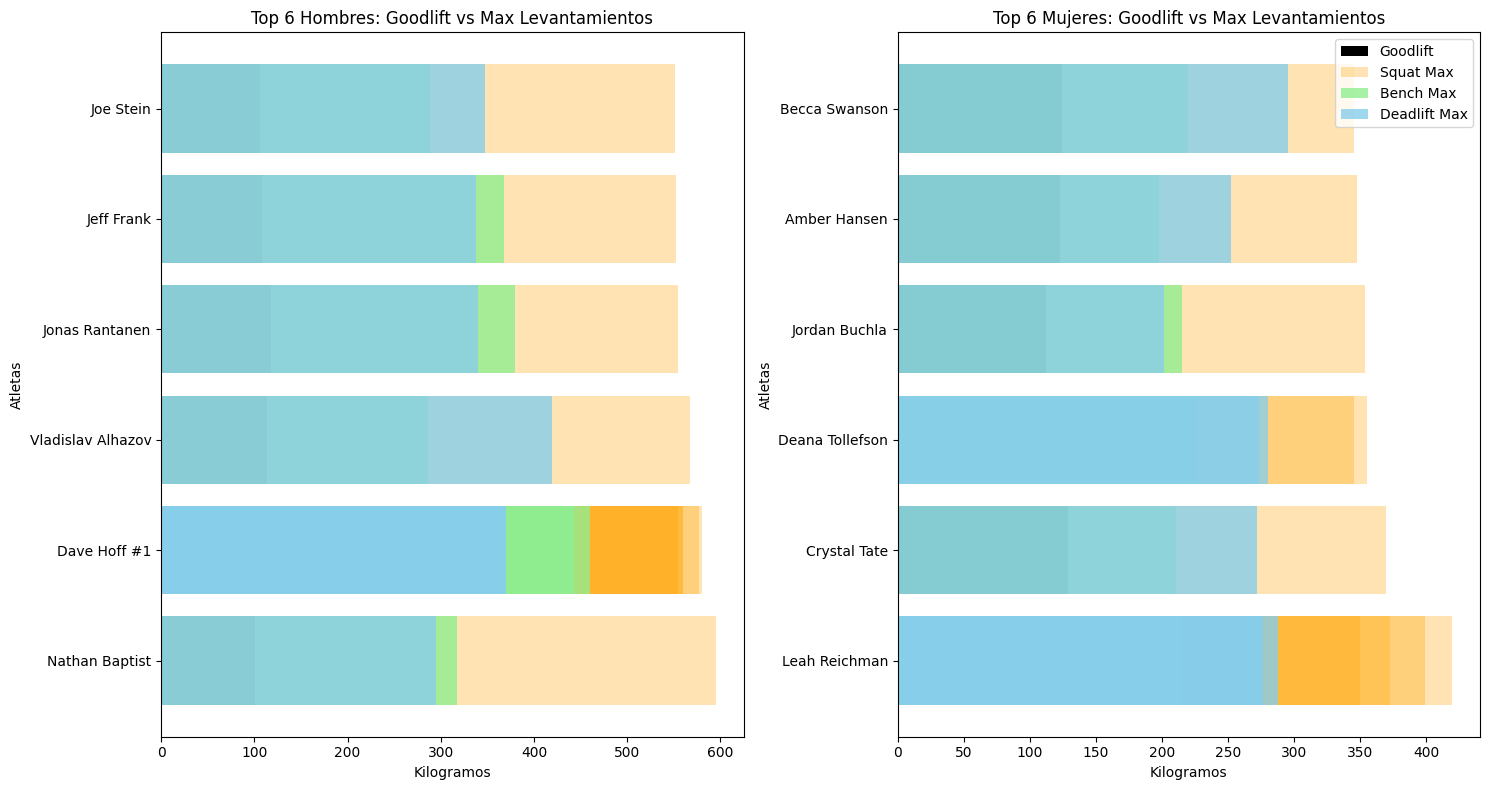

In [210]:
columns_to_keep = ['Name', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
                   'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
                   'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Goodlift', 'Sex']

df_power_lifts = df_p[columns_to_keep]

df_power_lifts['Squat_max'] = df_power_lifts[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].max(axis=1) # Obtener el valor máximo de los tres intentos de squat, bench y deadlift
df_power_lifts['Bench_max'] = df_power_lifts[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].max(axis=1)
df_power_lifts['Deadlift_max'] = df_power_lifts[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].max(axis=1)


top_men = df_power_lifts[df_power_lifts['Sex'] == 'M'].nlargest(10, ['Squat_max', 'Bench_max', 'Deadlift_max']) # Filtrar y obtener los atletas con los máximos levantamientos de cada sexo.
top_women = df_power_lifts[df_power_lifts['Sex'] == 'F'].nlargest(10, ['Squat_max', 'Bench_max', 'Deadlift_max'])


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axs[0].barh(top_men['Name'], top_men['Goodlift'], color='purple', label='Goodlift')
axs[0].barh(top_men['Name'], top_men['Squat_max'], color='orange', alpha=0.3, label='Squat Max')
axs[0].barh(top_men['Name'], top_men['Bench_max'], color='lightgreen', alpha=0.8, label='Bench Max')
axs[0].barh(top_men['Name'], top_men['Deadlift_max'], color='skyblue', alpha=0.8, label='Deadlift Max')
axs[0].set_ylabel('Atletas')
axs[0].set_xlabel('Kilogramos')
axs[0].set_title('Top 6 Hombres: Goodlift vs Max Levantamientos')

axs[1].barh(top_women['Name'], top_women['Goodlift'], color='black', alpha=1, label='Goodlift')
axs[1].barh(top_women['Name'], top_women['Squat_max'], color='orange', alpha=0.3, label='Squat Max')
axs[1].barh(top_women['Name'], top_women['Bench_max'], color='lightgreen', alpha=0.8, label='Bench Max')
axs[1].barh(top_women['Name'], top_women['Deadlift_max'], color='skyblue', alpha=0.8, label='Deadlift Max')
axs[1].set_ylabel('Atletas')
axs[1].set_xlabel('Kilogramos')
axs[1].set_title('Top 6 Mujeres: Goodlift vs Max Levantamientos')
axs[1].legend()

plt.tight_layout()
plt.show()

In [162]:
athlete_data = df_p[df_p['Name'] =='']
athlete_data[['Name', 'Goodlift', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'BodyweightKg']]

,Name,Goodlift,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,BodyweightKg


In [163]:
def top_unique_names_with_total(df_p, sex, n):
    columns_to_show = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']
    
    top_sex = df_p[(df_p['Sex'] == sex) & (df_p['Equipment'] == 'Raw')].nlargest(n, 'Goodlift')
    unique_names = top_sex['Name'].unique()
    top_unique = top_sex[top_sex['Name'].isin(unique_names)]
    top_unique_no_duplicates = top_unique.drop_duplicates(subset='Name')
    return top_unique_no_duplicates[['Name', 'Goodlift', 'TotalKg'] + columns_to_show]


top_men_unique = top_unique_names_with_total(df_p, 'M', 30)
top_women_unique = top_unique_names_with_total(df_p, 'F', 25)
df_top_men = pd.DataFrame(top_men_unique)
df_top_women = pd.DataFrame(top_women_unique)

In [164]:
df_top_men
#el problema es que había muchos datos faltantes y los rellenó con la moda.

,Name,Goodlift,TotalKg,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg
1753027,John Haack,136.01,1022.5,325.0,345.0,-365.5,237.5,255.0,267.5,370.0,395.0,410.0
1039281,Andrey Sapozhonkov,135.76,280.0,200.0,200.0,200.0,270.0,280.0,-285.0,200.0,200.0,200.0
2010788,Jeremy Hoornstra,133.70,305.0,200.0,200.0,200.0,120.0,120.0,-140.0,200.0,200.0,200.0
2958365,Oleg Perepechenov,132.47,287.5,200.0,200.0,200.0,270.0,282.5,287.5,200.0,200.0,200.0
981466,Roland Ezuruike,129.94,200.0,200.0,200.0,200.0,185.0,190.0,200.0,200.0,200.0,200.0
107938,Roman Eremashvili,129.82,245.0,200.0,200.0,200.0,230.0,241.0,245.0,200.0,200.0,200.0
979258,Paul Kehinde,129.81,222.5,200.0,200.0,200.0,211.0,-221.0,222.5,200.0,200.0,200.0
984460,Sherif Osman,129.12,205.0,200.0,200.0,200.0,200.0,205.0,-210.0,200.0,200.0,200.0
1751084,Eric Spoto,128.69,327.5,200.0,200.0,200.0,120.0,120.0,-140.0,200.0,200.0,200.0
1032494,Oleg Filimonov,128.41,272.5,200.0,200.0,200.0,262.5,272.5,-277.5,200.0,200.0,200.0


In [165]:
df_top_women


,Name,Goodlift,TotalKg,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg
984056,Lucy Ogechukwu Ejike,146.49,127.5,200.0,200.0,200.0,120.0,120.0,-140.0,200.0,200.0,200.0
2303600,April Mathis,145.50,205.0,200.0,200.0,200.0,120.0,120.0,-140.0,200.0,200.0,200.0
985670,Lucy Ihuoma,144.42,100.0,200.0,200.0,200.0,95.0,-100.0,100.0,200.0,200.0,200.0
986193,Esther Osa Oyema,144.30,135.0,200.0,200.0,200.0,125.0,130.0,135.0,200.0,200.0,200.0
979146,Nazmiye Muslu Muratlı,144.27,106.0,200.0,200.0,200.0,100.0,104.0,106.0,200.0,200.0,200.0
983818,Noura Baddour,142.79,85.0,200.0,200.0,200.0,80.0,85.0,-87.0,200.0,200.0,200.0
981557,Zhe Cui,139.39,102.0,200.0,200.0,200.0,96.0,102.0,-105.0,200.0,200.0,200.0
984049,Lidiya Solovyova,139.03,105.0,200.0,200.0,200.0,120.0,120.0,-140.0,200.0,200.0,200.0
1759714,Kristy Hawkins,137.67,687.5,252.5,265.0,-272.5,142.5,150.0,-155.0,260.0,272.5,-280.0
985344,Lingling Guo,137.26,105.0,200.0,200.0,200.0,103.0,-105.0,105.0,200.0,200.0,200.0


In [209]:
competidoras_open = df_p[(df_p['Division'] == 'Open') & (df_p['Sex'] == 'F')]
competidoras_open


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Federation,Date,MeetName,Squat_mean,Bench_mean,Deadlift_mean,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio,Year
2247,Kerstin Uridat,F,SBD,Wraps,24.0,24-34,Open,80.00,82.5,-80.0,...,WUAP-AUT,2021-08-28,Österreichische Staatsmeisterschaft & Internat...,-30.000000,13.333333,130.000000,-0.375000,0.166667,1.625000,2021
2259,Sabrina Horanek,F,B,Multi-ply,31.0,24-34,Open,82.50,82.5,200.0,...,WUAP-AUT,2021-08-28,Österreichische Staatsmeisterschaft & Internat...,200.000000,13.333333,200.000000,2.424242,0.161616,2.424242,2021
2329,Bianca Al-Wazzan,F,SBD,Wraps,35.0,35-39,Open,52.75,56,90.0,...,WUAP-AUT,2022-04-23,Österreichische Staatsmeisterschaft & Internat...,95.000000,14.166667,35.000000,1.800948,0.268562,0.663507,2022
2341,Stefanie Rida-Tupy,F,SBD,Wraps,38.5,35-39,Open,65.00,67.5,75.0,...,WUAP-AUT,2022-04-23,Österreichische Staatsmeisterschaft & Internat...,21.666667,-18.333333,110.000000,0.333333,-0.282051,1.692308,2022
2345,Elbisa Zehethofer,F,D,Multi-ply,48.5,45-49,Open,56.00,56,NaN,...,WUAP-AUT,2022-04-23,Österreichische Staatsmeisterschaft & Internat...,NaN,NaN,NaN,NaN,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030197,Inna Orobets,F,SBD,Single-ply,45.0,45-49,Open,109.30,84+,235.0,...,IPF,2016-11-14,World Open Championships,78.333333,181.666667,208.333333,0.716682,1.662092,1.906069,2016
3030198,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,Open,113.22,84+,-237.5,...,IPF,2016-11-14,World Open Championships,-82.500000,189.166667,58.333333,-0.728670,1.670788,0.515221,2016
3030199,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,Open,110.79,84+,210.0,...,IPF,2016-11-14,World Open Championships,220.000000,63.333333,60.000000,1.985739,0.571652,0.541565,2016
3030200,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,Open,124.53,84+,210.0,...,IPF,2016-11-14,World Open Championships,67.500000,47.500000,-55.000000,0.542038,0.381434,-0.441661,2016


In [251]:

def mostrar_info(df, n):
    top_n = df.nlargest(n, 'Goodlift')
    info = top_n[['Name', 'Goodlift', 'BodyweightKg', 'Squat3Kg', 'Bench3Kg', 'Deadlift3Kg']]

   
    info['Squat_BW_ratio'] = info['Squat3Kg'] / info['BodyweightKg']  # Calcular la cantidad de veces que levanta su peso corporal en cada ejercicio
    info['Bench_BW_ratio'] = info['Bench3Kg'] / info['BodyweightKg']
    info['Deadlift_BW_ratio'] = info['Deadlift3Kg'] / info['BodyweightKg']
    
  
    info = info.drop_duplicates(subset='Name')
    
    return info 

In [280]:
relacion_peso= mostrar_info(df_p, 10)
relacion_peso
#finalmente no la usé, pero la dejé ahí por si la necesitaba.

C:\Users\enrik\AppData\Local\Temp\ipykernel_17456\2517998409.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['Squat_BW_ratio'] = info['Squat3Kg'] / info['BodyweightKg']
C:\Users\enrik\AppData\Local\Temp\ipykernel_17456\2517998409.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['Bench_BW_ratio'] = info['Bench3Kg'] / info['BodyweightKg']
C:\Users\enrik\AppData\Local\Temp\ipykernel_17456\2517998409.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Name,Goodlift,BodyweightKg,Squat3Kg,Bench3Kg,Deadlift3Kg,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio
1003446,Jimmy Kolb,176.13,149.40,200.0,635.5,200.0,1.338688,4.253681,1.338688
1002288,Greg Powell,157.18,110.40,200.0,517.5,200.0,1.811594,4.687500,1.811594
2974773,Ekaterina Zaytseva,155.12,82.50,200.0,295.0,200.0,2.424242,3.575758,2.424242
745392,Rob Forell,153.16,89.86,200.0,-140.0,200.0,2.225684,-1.557979,2.225684
2509883,Ashleigh Hoeta,153.01,109.50,200.0,317.5,200.0,1.826484,2.899543,1.826484


In [281]:

df_p['Squat_mean'] = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].mean(axis=1) # Calcular la media de los movimientos por atleta
df_p['Bench_mean'] = df_p[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].mean(axis=1)
df_p['Deadlift_mean'] = df_p[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].mean(axis=1)



df_p['Squat_BW_ratio'] = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].mean(axis=1) / df_p['BodyweightKg']# Calcular el ratio del peso corporal para cada movimiento
df_p['Bench_BW_ratio'] = df_p[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].mean(axis=1) / df_p['BodyweightKg']
df_p['Deadlift_BW_ratio'] = df_p[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].mean(axis=1) / df_p['BodyweightKg']

# Convertir valores negativos a 0 en las columnas de ratio
df_p[['Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']] = df_p[['Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']].applymap(lambda x: max(0, x))

C:\Users\enrik\AppData\Local\Temp\ipykernel_17456\3914078622.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_p[['Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']] = df_p[['Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']].applymap(lambda x: max(0, x))


In [282]:
max_ratios = df_p.groupby('Name')[['Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']].max()

max_indices = max_ratios.idxmax(axis=1)  # Obtener los índices de los máximos valores de cada ratio

max_values = df_p.loc[max_indices] # Seleccionar los registros correspondientes a los máximos ratios

max_values[['Name', 'Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']]

KeyError: "None of [Index(['Deadlift_BW_ratio', 'Squat_BW_ratio', 'Deadlift_BW_ratio',\n       'Squat_BW_ratio', 'Squat_BW_ratio', 'Squat_BW_ratio', 'Squat_BW_ratio',\n       'Squat_BW_ratio', 'Squat_BW_ratio', 'Squat_BW_ratio',\n       ...\n       'Deadlift_BW_ratio', 'Squat_BW_ratio', 'Squat_BW_ratio',\n       'Deadlift_BW_ratio', 'Squat_BW_ratio', 'Deadlift_BW_ratio',\n       'Squat_BW_ratio', 'Deadlift_BW_ratio', 'Squat_BW_ratio',\n       'Squat_BW_ratio'],\n      dtype='object', length=792455)] are in the [index]"

In [283]:
top_10_goodlift = df_p.nlargest(10, 'Goodlift') #calculamos los mejores goodlifts
selected_columns = ['Name', 'BodyweightKg', 'Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio'] #seleccionamos las columnas donde tenemos los ratios
top_10_goodlift[selected_columns]

,Name,BodyweightKg,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio
1003446,Jimmy Kolb,149.40,1.338688,0.000000,1.338688
1009051,Jimmy Kolb,148.30,1.348618,0.000000,1.348618
998782,Jimmy Kolb,142.93,1.399286,0.233214,1.399286
1011955,Jimmy Kolb,146.50,1.365188,1.253697,1.365188
1002288,Greg Powell,110.40,1.811594,0.000000,1.811594
2974773,Ekaterina Zaytseva,82.50,2.424242,3.333333,2.424242
745392,Rob Forell,89.86,2.225684,0.370947,2.225684
2509883,Ashleigh Hoeta,109.50,1.826484,2.747336,1.826484
997372,Greg Powell,110.00,1.818182,1.234848,1.818182
997374,Greg Powell,110.00,1.818182,1.234848,1.818182


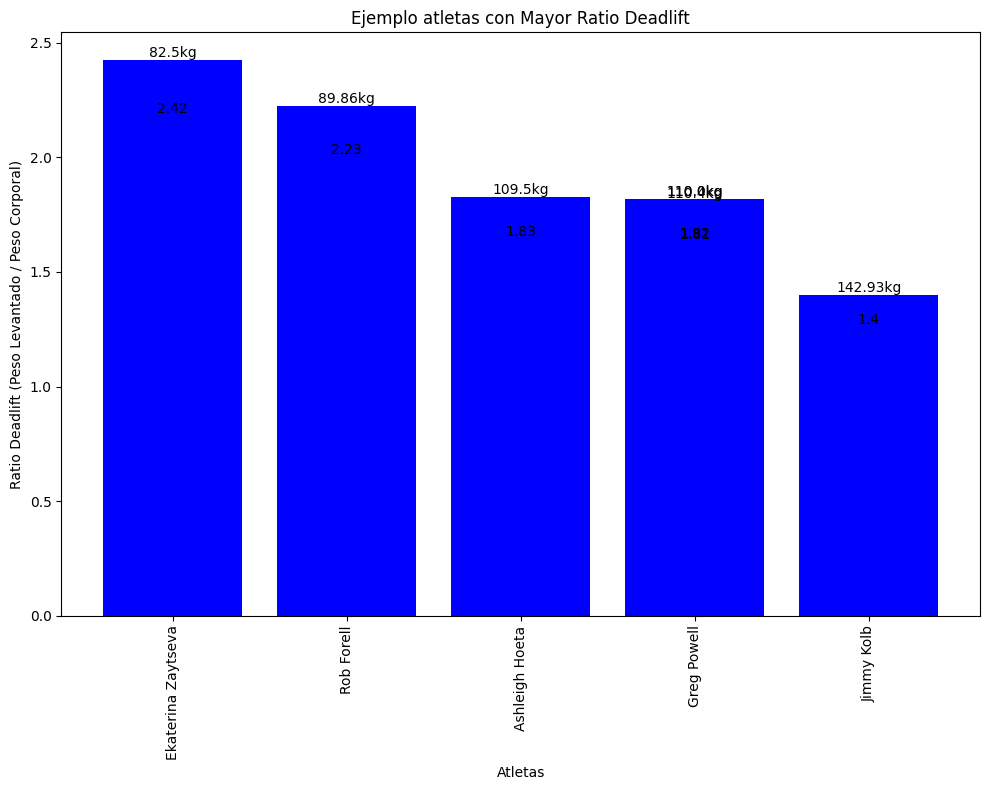

In [287]:

top_10_ratios = selected_data.nlargest(7, 'Deadlift_BW_ratio') # Seleccionar los datos de los atletas con los ratios más altos

fig, ax = plt.subplots(figsize=(10, 8))


bars = ax.bar(top_10_ratios['Name'], top_10_ratios['Deadlift_BW_ratio'], color='blue')

ax.set_xlabel('Atletas')
ax.set_ylabel('Ratio Deadlift (Peso Levantado / Peso Corporal)')
ax.set_title('Ejemplo atletas con Mayor Ratio Deadlift')


for i, bar in enumerate(bars): # Mostrar el peso corporal y el ratio encima de cada barra
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{top_10_ratios['BodyweightKg'].iloc[i]}kg",
            ha='center', va='bottom')
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1 * bar.get_height(),
            round(bar.get_height(), 2), ha='center', va='bottom')

# Ajustar diseño
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


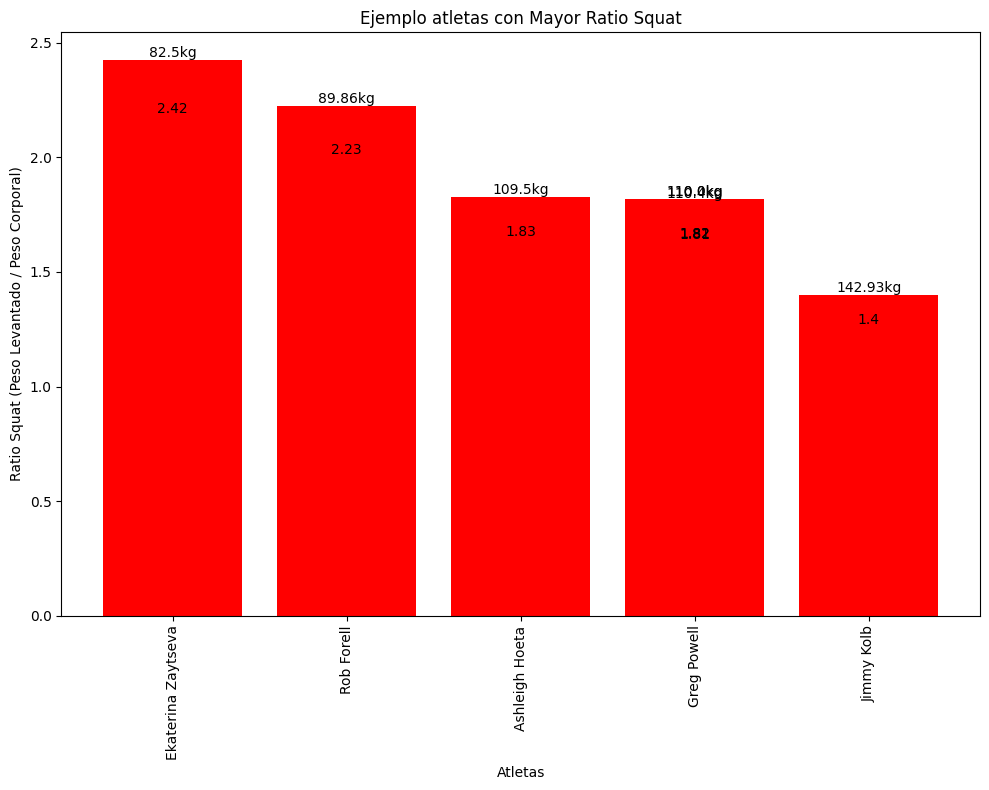

In [265]:

top_10_ratios = selected_data.nlargest(7, 'Squat_BW_ratio')


fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.bar(top_10_ratios['Name'], top_10_ratios['Squat_BW_ratio'], color='red')


ax.set_xlabel('Atletas')
ax.set_ylabel('Ratio Squat (Peso Levantado / Peso Corporal)')
ax.set_title('Ejemplo atletas con Mayor Ratio Squat')

for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{top_10_ratios['BodyweightKg'].iloc[i]}kg",
            ha='center', va='bottom')
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1 * bar.get_height(),
            round(bar.get_height(), 2), ha='center', va='bottom')

# Ajustar diseño
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

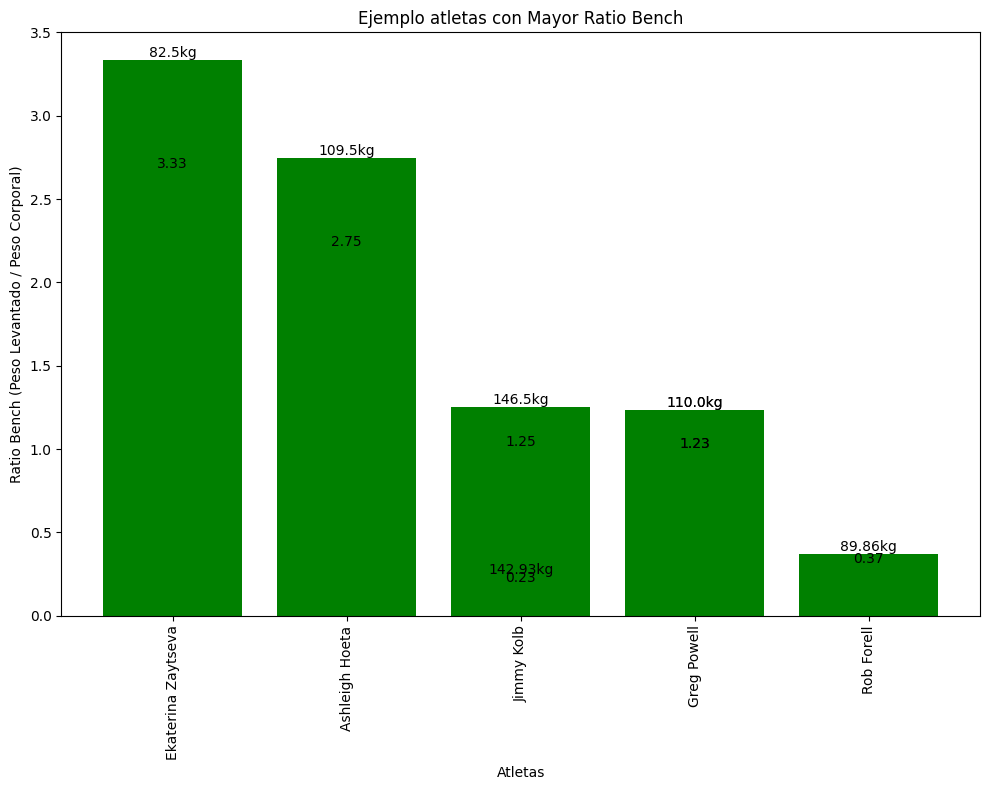

In [288]:

top_10_ratios = selected_data.nlargest(7, 'Bench_BW_ratio')


fig, ax = plt.subplots(figsize=(10, 8))


bars = ax.bar(top_10_ratios['Name'], top_10_ratios['Bench_BW_ratio'], color='green')


ax.set_xlabel('Atletas')
ax.set_ylabel('Ratio Bench (Peso Levantado / Peso Corporal)')
ax.set_title('Ejemplo atletas con Mayor Ratio Bench')


for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{top_10_ratios['BodyweightKg'].iloc[i]}kg",
            ha='center', va='bottom')
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.2 * bar.get_height(),
            round(bar.get_height(), 2), ha='center', va='bottom')

# Ajustar diseño
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\enrik\AppData\Local\Temp\ipykernel_17456\4221639904.py:7: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  promedio_wilks_por_año = df_p.groupby('Year', 'Division' == 'Open')['Goodlift'].mean()


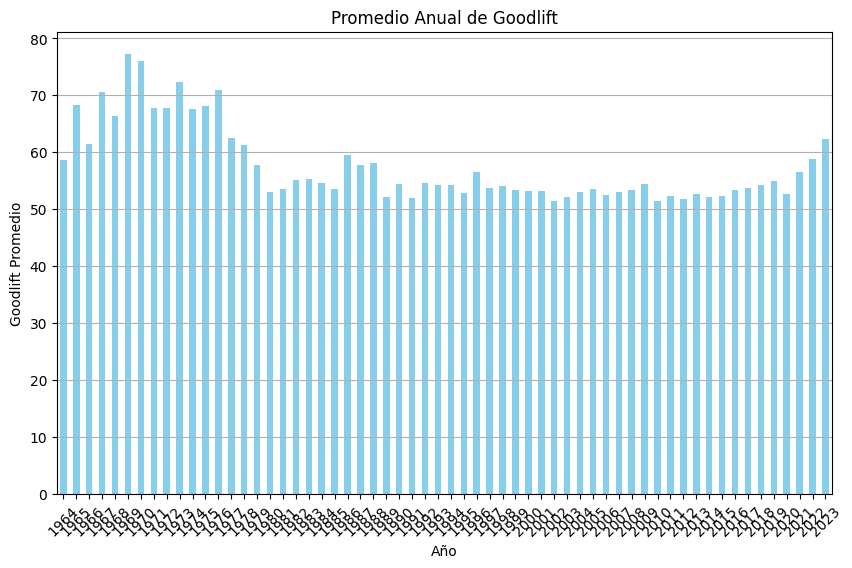

In [174]:
#Mirar si las media de las marcas han mejorado a medida que pasan los años. 

df_p['Year'] = df_p['Date'].dt.year # Extraemos el año de la columna 'Date'


promedio_gl_por_año = df_p.groupby('Year', 'Division' == 'Open')['Goodlift'].mean() # Calcular el promedio de Goodlift por añoa través de la media


plt.figure(figsize=(10, 6))
promedio_gl_por_año.plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Goodlift Promedio')
plt.title('Promedio Anual de Goodlift')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [258]:
max_tk = df_p[df_p['TotalKg'] == df_p['TotalKg'].max()]

print(max_tk[['Name', 'TotalKg']]) 
# Mostrar la información del atleta con la máxima puntuación de Wilks

                 Name  TotalKg
1183050  Dave Hoff #1   1407.5


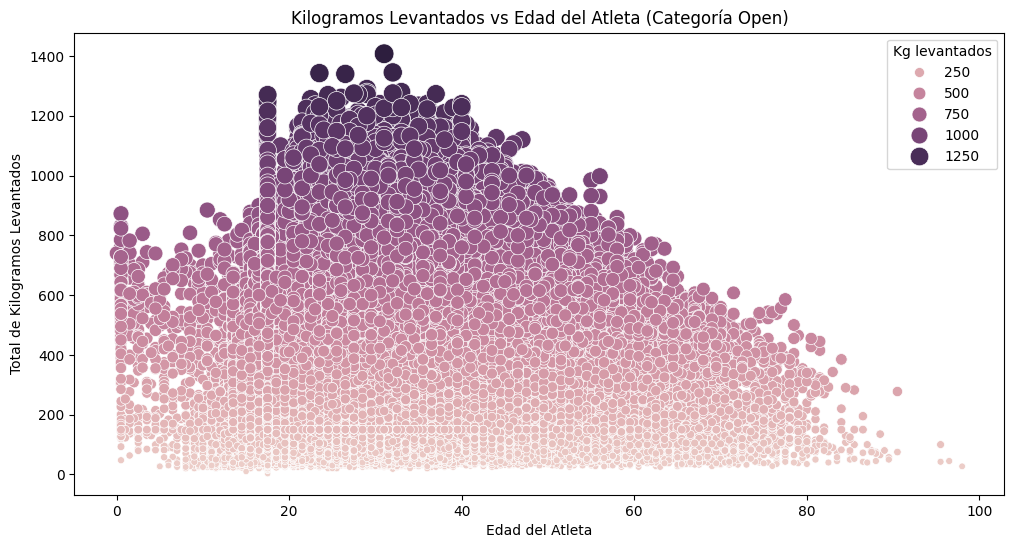

In [291]:
df_open = df_p[df_p['Division'] == 'Open'] #seleccionamos la categoría OPEN

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='TotalKg', data=df_open, hue='TotalKg', size='TotalKg', sizes=(20, 200))
plt.xlabel('Edad del Atleta')
plt.ylabel('Total de Kilogramos Levantados')
plt.title('Kilogramos Levantados vs Edad del Atleta (Categoría Open)')
plt.legend(title='Kg levantados')
plt.show()

In [260]:
earliest_year_per_athlete = df_p.groupby('Name')['Year'].min()

# Ordena los atletas según el año más bajo registrado
earliest_year_per_athlete = earliest_year_per_athlete.sort_values()

# Muestra los atletas con los registros más antiguos
print(earliest_year_per_athlete.head(10))  # Muestra los 10 atletas con registros más antiguos

Name
Arpin                1964
Ed Morliens          1964
M. Dow               1964
Stanley Blinder      1964
B. Humble            1964
Robert Scott #3      1964
William Gladstone    1964
O'Murphy             1964
Vic Renalson         1964
Paul Majors          1964
Name: Year, dtype: int32
